<a href="https://colab.research.google.com/github/allanstar-byte/CHURN-_PREDICTION_TELECUMMUNICATION/blob/main/CHURN__PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHURN _PREDICTION**

## **1. Defining the Question**

### **a) Specifying the Question**

The ain concern here is to build models to predict churn. The predictive model that that will serve two purposes:

  i.	It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

  ii.	It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks. In some cases, both of the above-stated goals can be achieved by a single machine learning model. But here, you have a large number of attributes, and thus you should try using a dimensionality reduction technique such as PCA and then build a predictive model. After PCA, you can use any classification model.


### **b) Defining the Metric for Success**

The analysis will be considered a success when a predictive model with a  high accuracy level and high predictability power is achieved for the prediction and insightful exploratory dta analysis is achieved.

### **c) Recording the Experimental Design**

The experiantal desigh to be used is the CRISP-DM format:

1. Business understanding

2. Data Understanding

3. Data cleaning

4. Exploratory Data Analysis

5. Modeling

6. Evaluation/ Hyperameter tuning

### **d) Data Relevance**

The datasets are large enough to be used for analysis and modelling, thus promising a better outcome.

### **e) Reading the Data**

In [ ]:
# iporting libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
# reading the dataset

df = pd.read_csv('/content/telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,...,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,968.0,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,...,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,NaN,1006.0,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,...,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,1103.0,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2491.0,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1526.0,0.0,0.0,0.00,0.00


## **2. Data Understanding**

In [ ]:
# identifying the data types and the shape of the dataset in our dataset
#
# datatypes
df.info()

# data shape
print('------------------------------------------------------------')

print('The shape of the dataset is: ', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35772 entries, 0 to 35771
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(212), int64(2), object(12)
memory usage: 61.7+ MB
------------------------------------------------------------
The shape of the dataset is:  (35772, 226)


In [ ]:
# checking for unique values in the following columns
#
# circle_id

print('circle_id', df['circle_id'].unique())

# loc_og_t2o_mou
print('loc_og_t2o_mou', df['loc_og_t2o_mou'].unique())

# std_og_t2o_mou
print('std_og_t2o_mou', df['std_og_t2o_mou'].unique())

# loc_ic_t2o_mou
print('loc_ic_t2o_mou', df['loc_ic_t2o_mou'].unique())

circle_id [109]
loc_og_t2o_mou [ 0. nan]
std_og_t2o_mou [ 0. nan]
loc_ic_t2o_mou [ 0. nan]


## **3. Data Preparation**

### **i). Deriving new features new features**

In [ ]:
# dropping irrelevant columns

df1 = df.drop(columns={'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
                       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
                       'std_og_t2c_mou_9', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
                       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
                       'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
                       'date_of_last_rech_data_9'})
df1.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,...,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,968.0,30.4,0.0,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,...,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,NaN,1006.0,0.0,0.0,0.00,0.00
2,7001625959,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,...,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,1103.0,0.0,0.0,4.17,0.00
3,7001204172,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,118.68,37.99,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2491.0,0.0,0.0,0.00,0.00
4,7000142493,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.0,0.00,0.00,0.00,117.96,241.33,208.16,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1526.0,0.0,0.0,0.00,0.00


### **ii). Filter high-value customers**

High-value customers are defined as follows:

Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [ ]:
df1.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,...,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,968.0,30.4,0.0,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,...,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,NaN,1006.0,0.0,0.0,0.00,0.00
2,7001625959,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,...,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,1103.0,0.0,0.0,4.17,0.00
3,7001204172,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,118.68,37.99,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2491.0,0.0,0.0,0.00,0.00
4,7000142493,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.0,0.00,0.00,0.00,117.96,241.33,208.16,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1526.0,0.0,0.0,0.00,0.00


In [ ]:
# creating the threshold for the good phase periods
df1['av_6_thresh'] = (df1['av_rech_amt_data_6'] * 0.7)
df1['av_7_thresh'] = (df1['av_rech_amt_data_7'] * 0.7)

# giving a comparison from the threshold
df1['Bool_Price_Increase_6'] = df1['max_rech_data_6'] >= (df1['av_6_thresh'])
df1['Bool_Price_Increase_7'] = df1['max_rech_data_7'] >= (df1['av_7_thresh'])

# returning the values of were both Bool price increase == True
df2 = df1.loc[lambda df1: df1['Bool_Price_Increase_6'] == True]
df3 =df2.loc[lambda df2: df2['Bool_Price_Increase_7'] == True]

high_value = df3.drop(columns={'Bool_Price_Increase_6', 'Bool_Price_Increase_7', 'av_6_thresh', 'av_7_thresh'})

# High value customers are
high_value.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,...,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,968.0,30.40,0.00,101.20,3.58
19,7001754084,163.430,241.218,326.920,75.229,4.04,7.38,13.61,22.19,0.51,41.28,9.46,3.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.04,6.89,13.61,22.19,0.51,1.49,9.46,3.11,0.0,0.00,0.00,0.00,0.00,0.95,0.0,0.00,4.56,8.39,23.08,...,212.10,335.99,0.00,0.00,0.66,4.36,NaN,3.01,21.40,20.88,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,1104.0,454.53,466.06,0.00,0.00
39,7001638780,134.945,130.827,122.780,122.773,0.00,0.00,0.00,0.00,4.36,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,122.07,122.07,-0.04,0.00,122.07,122.07,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,424.0,0.00,0.00,0.00,0.00
44,7002055948,226.063,210.015,331.980,202.214,58.54,13.16,188.74,59.93,57.19,61.36,46.96,28.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.54,13.16,188.74,59.93,45.28,61.36,44.63,26.88,0.0,0.00,0.00,1.70,11.91,0.00,0.0,0.00,103.83,74.53,233.38,...,581.83,622.69,768.06,16.67,0.01,0.01,150.67,0.00,0.00,0.00,150.67,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2715.0,238.20,75.15,114.42,0.00
55,7001794818,29.241,61.073,78.372,115.634,1.40,5.38,28.48,52.13,18.44,39.08,46.26,62.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.40,5.38,28.48,52.13,13.88,30.79,35.56,50.99,0.0,3.41,3.23,2.48,4.56,2.41,0.0,5.59,15.28,39.59,67.28,...,0.00,0.00,0.00,0.00,0.00,NaN,NaN,0.10,0.20,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,694.0,0.00,0.00,0.00,0.00


### **iii). Tag churners and remove attributes of the churn phase**

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

●	total_ic_mou_9

●	total_og_mou_9

●	vol_2g_mb_9

●	vol_3g_mb_9

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).


In [ ]:
# writing a funtion to identify churn in our dataset
def label_churn (row):
   if row['total_ic_mou_9'] == 0 :
      return '1'
   if row['total_og_mou_9'] == 0 :
      return '1'
   if row['vol_2g_mb_9'] == 0:
      return '1'
   if row['vol_3g_mb_9']  == 0:
      return '1'
   return '0'

In [ ]:
# creating a colun for churn
high_value['churn'] = high_value.apply (lambda row: label_churn(row), axis=1)
high_value.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,...,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,...,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,968.0,30.40,0.00,101.20,3.58,1
19,7001754084,163.430,241.218,326.920,75.229,4.04,7.38,13.61,22.19,0.51,41.28,9.46,3.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.04,6.89,13.61,22.19,0.51,1.49,9.46,3.11,0.0,0.00,0.00,0.00,0.00,0.95,0.0,0.00,4.56,8.39,23.08,...,335.99,0.00,0.00,0.66,4.36,NaN,3.01,21.40,20.88,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,1104.0,454.53,466.06,0.00,0.00,1
39,7001638780,134.945,130.827,122.780,122.773,0.00,0.00,0.00,0.00,4.36,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,122.07,122.07,-0.04,0.00,122.07,122.07,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,424.0,0.00,0.00,0.00,0.00,1
44,7002055948,226.063,210.015,331.980,202.214,58.54,13.16,188.74,59.93,57.19,61.36,46.96,28.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.54,13.16,188.74,59.93,45.28,61.36,44.63,26.88,0.0,0.00,0.00,1.70,11.91,0.00,0.0,0.00,103.83,74.53,233.38,...,622.69,768.06,16.67,0.01,0.01,150.67,0.00,0.00,0.00,150.67,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2715.0,238.20,75.15,114.42,0.00,0
55,7001794818,29.241,61.073,78.372,115.634,1.40,5.38,28.48,52.13,18.44,39.08,46.26,62.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.40,5.38,28.48,52.13,13.88,30.79,35.56,50.99,0.0,3.41,3.23,2.48,4.56,2.41,0.0,5.59,15.28,39.59,67.28,...,0.00,0.00,0.00,0.00,NaN,NaN,0.10,0.20,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,694.0,0.00,0.00,0.00,0.00,1


In [ ]:
# checking for the unique values in the churn column
high_value['churn'].unique()

array(['1', '0'], dtype=object)

In [ ]:
# dropping the unwantend columns

high_value_1 = high_value.drop(columns={'total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9',
                                        'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
                                        'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 
                                        'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 
                                        'monthly_3g_9', 'sachet_3g_9', 'fb_user_9'})
high_value_1.shape

(2353, 181)

In [ ]:
# filling nulll values with 0
high_value_2 = high_value_1.fillna(0)
high_value_2.shape
high_value_2.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,...,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,252.0,252.0,252.0,0.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,3.58,1
19,7001754084,163.430,241.218,326.920,4.04,7.38,13.61,0.51,41.28,9.46,0.0,0.0,0.0,0.0,0.0,0.0,4.04,6.89,13.61,0.51,1.49,9.46,0.0,0.00,0.00,0.00,0.95,0.0,4.56,8.39,23.08,0.0,0.48,0.0,0.0,0.0,38.83,0.00,0.00,0.0,...,154.0,154.0,274.0,0.0,514.81,445.26,235.52,0.00,212.10,335.99,0.00,0.66,4.36,3.01,21.40,20.88,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1104.0,454.53,466.06,0.00,0.00,1
39,7001638780,134.945,130.827,122.780,0.00,0.00,0.00,4.36,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,154.0,154.0,145.0,145.0,131.44,229.28,238.21,0.00,0.00,0.00,0.00,0.00,122.07,-0.04,0.00,122.07,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,424.0,0.00,0.00,0.00,0.00,1
44,7002055948,226.063,210.015,331.980,58.54,13.16,188.74,57.19,61.36,46.96,0.0,0.0,0.0,0.0,0.0,0.0,58.54,13.16,188.74,45.28,61.36,44.63,0.0,0.00,0.00,11.91,0.00,0.0,103.83,74.53,233.38,0.0,0.00,0.0,0.0,0.0,0.00,2.33,0.00,0.0,...,154.0,154.0,212.0,179.0,20.82,14.71,63.72,668.19,581.83,622.69,16.67,0.01,0.01,0.00,0.00,0.00,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2715.0,238.20,75.15,114.42,0.00,0
55,7001794818,29.241,61.073,78.372,1.40,5.38,28.48,18.44,39.08,46.26,0.0,0.0,0.0,0.0,0.0,0.0,1.40,5.38,28.48,13.88,30.79,35.56,0.0,3.41,3.23,4.56,2.41,0.0,15.28,39.59,67.28,0.0,0.00,0.0,0.0,0.0,0.75,7.46,3.38,0.0,...,14.0,17.0,0.0,0.0,2.57,1.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10,0.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,694.0,0.00,0.00,0.00,0.00,1


## **4. Exploratory Data Analysis**

checking the average revenue per user over the three months.

In [ ]:
rev = df.drop(columns={'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
                       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
                       'std_og_t2c_mou_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
                       'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
                       'date_of_last_rech_data_9'})

In [ ]:
# descriptive statistics
rev.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,3.577200e+04,35771.000000,35771.000000,35771.000000,35771.000000,34360.000000,34373.000000,33827.000000,32954.000000,34360.000000,34373.000000,33827.000000,32954.000000,34360.000000,34373.000000,33827.000000,32954.000000,34360.000000,34373.000000,33827.000000,32954.000000,34360.000000,34373.000000,33827.000000,32954.000000,34360.000000,34373.000000,33827.000000,32954.000000,34360.000000,34373.000000,33827.000000,32954.000000,34360.000000,34373.00000,33827.000000,32954.000000,34360.000000,34373.000000,33827.000000,...,35771.000000,35771.000000,35771.000000,9089.000000,9168.000000,9478.000000,9280.000000,9089.000000,9168.000000,9478.000000,9280.000000,9089.000000,9168.000000,9478.000000,9280.000000,35771.000000,35771.000000,35771.000000,35771.000000,35771.000000,35771.000000,35771.000000,35771.000000,35771.000000,35771.000000,35771.000000,35771.000000,35771.000000,35771.000000,35771.000000,35771.000000,9089.000000,9168.000000,9478.000000,9280.000000,35771.000000,35771.000000,35771.000000,35771.000000,35771.000000
mean,7.001202e+09,282.472086,276.661808,277.739854,260.370918,129.581757,131.522933,132.552985,129.728068,198.447765,197.772714,196.711265,189.069524,9.604745,7.093818,7.180524,6.618561,13.544192,9.651440,9.770784,8.396337,46.061680,45.631581,45.636957,44.099360,94.126593,92.430116,93.324125,91.524687,3.743538,3.815652,3.705041,3.631284,1.151797,1.39162,1.481383,1.256683,143.939151,141.884688,142.673453,...,128.765109,134.056806,134.590076,88.848880,88.764908,90.634407,99.332612,86.092017,85.926198,85.194084,94.187637,0.024205,0.023015,0.019308,0.014440,0.078471,0.080065,0.080708,0.066143,0.398619,0.442034,0.453356,0.395488,0.075368,0.078751,0.081071,0.086187,0.074334,0.078304,0.085936,0.087613,0.914182,0.910558,0.891538,0.861746,1220.676945,67.184758,66.001106,59.094829,3.359338
std,6.971376e+05,313.010628,306.545003,316.625821,309.069005,289.638795,308.046171,317.629080,310.229557,318.550461,330.548646,327.956743,312.714699,57.598843,55.824674,57.764021,56.029736,68.971863,57.874148,62.826378,55.783294,145.662528,152.327556,159.043481,147.071042,163.335341,158.737155,161.418092,159.630075,12.781490,12.946069,12.634482,12.155747,5.633119,7.61795,7.546941,5.960515,250.157262,247.258485,253.952763,...,539.795202,550.311425,578.181731,196.522284,192.941407,186.055336,196.810583,178.204043,174.728642,166.436456,172.779784,0.153694,0.149959,0.137612,0.119301,0.292709,0.298851,0.301520,0.272056,1.504639,1.632838,1.639300,1.336944,0.361434,0.378155,0.373009,0.377272,0.569207,0.574884,0.650967,0.711215,0.280111,0.285396,0.310979,0.345185,955.890809,255.981309,265.237073,246.771778,32.786958
min,7.000000e+09,-2041.228000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

From this point we can observe the measures of central tendency from each column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


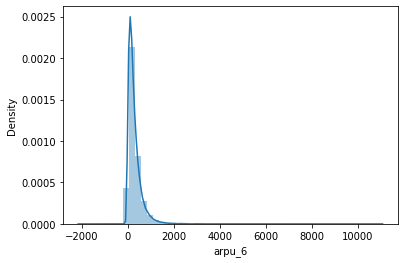

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


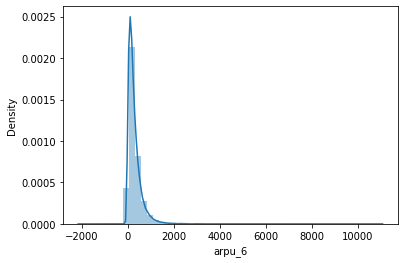

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


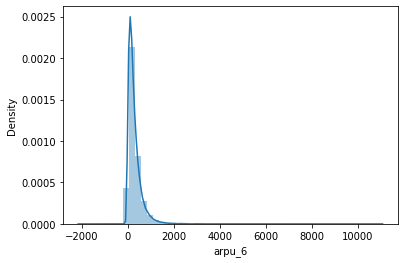

In [ ]:
# plotting the average revenue per user
df1.loc[df1.arpu_6.isnull(), 'arpu_6'] = 0
sns.distplot(df1.arpu_6)
plt.show();

df1.loc[df1.arpu_6.isnull(), 'arpu_7'] = 0
sns.distplot(df1.arpu_6)
plt.show();

df1.loc[df1.arpu_6.isnull(), 'arpu_6'] = 0
sns.distplot(df1.arpu_6)
plt.show();

The distribution of revenue per user seems to be contant over the three moths

## **5. Modeling**

### **i).Multicollinearity**

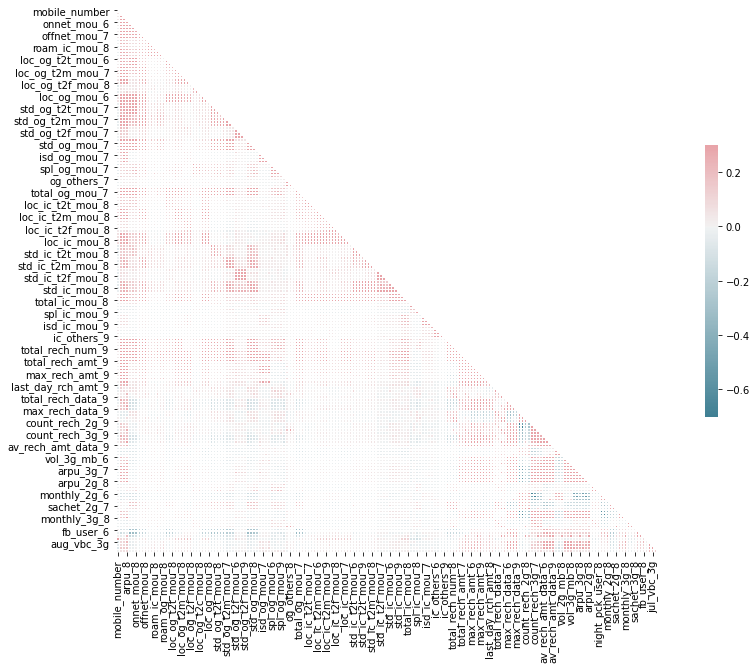

In [ ]:
# plotting a correlation matrix
corr = high_value_2.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .5})
plt.show();

As we can observe from the snippet above there are some columns with high multicollinearity.

### **ii).Dimension reduction and feature selection**

In [ ]:
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3

In [ ]:
#Adequacy Test
result_3 = high_value_2.drop(columns={'churn', 'mobile_number'})

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(result_3)
chi_square_value, p_value

/usr/local/lib/python3.7/dist-packages/factor_analyzer/factor_analyzer.py:188: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:1194: RuntimeWarning: invalid value encountered in subtract
  return sc.xlogy(df/2.-1, x) - x/2. - sc.gammaln(df/2.) - (np.log(2)*df)/2.


(inf, nan)

In [ ]:
# carrying out kmo
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(result_3)
kmo_model

/usr/local/lib/python3.7/dist-packages/factor_analyzer/factor_analyzer.py:50: RuntimeWarning: invalid value encountered in sqrt
  Is = np.sqrt(1 / np.diag(m))


nan

In [ ]:
#Choosing the Number of Factors

# Creating factor analysis object and perform factor analysis
from factor_analyzer.factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.analyze(result_3, 4, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,2.203634e+01
1,1.633793e+01
2,1.002774e+01
3,7.330199e+00
4,6.485380e+00
...,...
174,-1.834999e-14
175,-2.733096e-14
176,-3.783871e-14
177,-4.663183e-14


In [ ]:
# choosing values with Original_Eigenvalues greater than 1
ev1 =ev.loc[lambda ev: ev['Original_Eigenvalues'] >= 1 ]
ev1.count()

Original_Eigenvalues    41
dtype: int64

Only 41 parameters had eigenvalues above 1.

In [ ]:
#Performing Factor Analysis
# Creating factor analysis object and perform factor analysis
#
fa = FactorAnalyzer()
fa.analyze(result_3, 41, rotation="varimax")
fa.loadings.head(41)

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20,Factor21,Factor22,Factor23,Factor24,Factor25,Factor26,Factor27,Factor28,Factor29,Factor30,Factor31,Factor32,Factor33,Factor34,Factor35,Factor36,Factor37,Factor38,Factor39,Factor40,Factor41
arpu_6,0.455820,0.313648,0.200901,0.043601,0.036152,-0.010150,0.104924,0.276360,0.160951,0.042925,-0.008327,0.028539,0.157044,0.138886,0.041190,0.006944,0.030967,-0.014053,0.008935,0.042309,0.066778,0.033048,0.280552,0.345786,0.006793,0.011315,0.241495,0.151159,0.176253,-0.003505,-0.055595,0.068361,0.007345,0.060442,0.177057,-0.005744,-0.062713,0.142847,0.114244,-0.024655,-0.064799
arpu_7,0.375219,0.107858,0.179378,0.132110,0.077654,0.000232,0.077171,0.256855,0.344124,0.049191,-0.000669,-0.006652,0.185723,0.175770,0.037995,0.024499,0.031020,-0.013547,0.006896,0.064557,0.095244,-0.008201,0.474089,0.321732,-0.016015,-0.000753,-0.048676,0.031368,0.144842,0.030816,0.006764,0.019942,-0.023718,-0.044315,0.066074,0.067088,-0.030682,0.205388,0.073399,0.123262,0.015940
arpu_8,0.202354,0.090633,0.181418,0.121486,0.014665,0.080257,0.105113,0.217835,0.221896,0.041805,-0.002628,-0.005559,0.234855,0.188570,0.039215,0.029822,0.058139,-0.007784,0.002900,0.098169,0.037047,0.011757,0.361499,0.379377,0.000812,-0.011254,-0.106947,0.195861,0.188757,-0.013807,-0.053607,0.381087,0.008978,-0.018379,0.088765,-0.013457,0.170986,0.177955,-0.104468,-0.014269,0.009512
onnet_mou_6,0.237013,-0.015959,0.029174,0.008917,0.009930,-0.005346,0.000335,0.747874,-0.012385,0.095831,-0.006132,0.039885,0.366574,0.069363,-0.007327,-0.001787,0.015326,-0.015068,0.018551,-0.019358,0.074647,-0.037741,0.021859,-0.020799,0.029209,-0.012952,0.224694,0.020818,-0.017092,0.037022,-0.012441,-0.029069,0.024367,0.067056,0.013864,-0.112575,-0.102481,0.034715,-0.036970,-0.034176,-0.021735
onnet_mou_7,0.153715,-0.029993,0.031868,0.031138,0.011726,0.009468,-0.001616,0.828488,-0.003270,0.029946,-0.001388,0.019047,0.426336,0.053779,-0.008640,0.000573,0.067856,-0.021196,0.010128,-0.023819,0.110102,-0.002920,0.032470,-0.017920,-0.013627,0.019202,-0.043345,-0.051592,0.005012,0.020653,0.011768,-0.041967,-0.000029,-0.030670,-0.003191,-0.040578,-0.058364,0.041060,0.025761,0.017611,0.022511
onnet_mou_8,0.070919,-0.024143,0.028501,0.010304,-0.006242,0.026399,-0.003255,0.766584,0.003605,0.067119,-0.006659,0.029773,0.477675,0.053059,-0.005124,-0.006038,0.124243,-0.019137,-0.000563,0.005607,0.043366,-0.000564,0.039344,0.044058,-0.011393,0.019920,-0.123015,0.050337,0.000135,0.002478,-0.009137,0.020044,0.028345,-0.001687,0.062675,-0.074643,0.109436,0.034472,-0.014763,-0.016504,-0.015433
offnet_mou_6,0.755076,0.003462,0.165940,0.011273,0.018306,0.010811,0.044997,0.156619,0.003072,0.015863,0.003167,0.033203,0.006192,0.091427,0.011856,0.004458,0.112272,-0.009810,0.020731,-0.015150,0.014251,0.021875,0.056090,0.450574,0.011882,0.024061,0.181036,0.009202,0.071429,0.013651,-0.018578,0.007237,0.008529,0.072333,0.076861,-0.063745,0.038323,0.019046,0.082022,-0.031502,-0.041010
offnet_mou_7,0.735233,-0.003392,0.179371,0.153041,0.022508,-0.001045,0.038203,0.141303,0.031214,0.015691,0.005182,-0.001335,0.053969,0.107874,0.015323,0.010819,0.081078,-0.027040,-0.008450,-0.009132,0.026658,0.008711,0.130788,0.487930,-0.023795,0.006001,-0.148341,-0.073130,0.108401,0.011909,0.045145,-0.016023,-0.018505,-0.040885,0.050207,-0.016471,0.062314,0.080460,0.038264,0.023705,0.023990
offnet_mou_8,0.466573,-0.004037,0.196908,0.170006,0.013117,0.055820,0.059205,0.136544,0.013612,0.010370,0.017529,-0.005186,0.118088,0.095589,0.007835,0.026702,0.119406,-0.022974,0.004493,0.009434,-0.002872,-0.004279,0.135226,0.564000,0.005704,0.001085,-0.146377,0.065494,0.115191,0.000757,-0.012092,0.046114,0.008897,0.002875,0.057779,-0.041077,0.400383,0.087832,-0.144071,0.004142,0.004640
roam_ic_mou_6,0.013525,-0.010115,0.039277,0.062940,0.032233,0.053054,0.019684,0.004185,0.004321,0.027576,0.003

In [ ]:
#Getting variance of each factors
# 
fa.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20,Factor21,Factor22,Factor23,Factor24,Factor25,Factor26,Factor27,Factor28,Factor29,Factor30,Factor31,Factor32,Factor33,Factor34,Factor35,Factor36,Factor37,Factor38,Factor39,Factor40,Factor41
SS Loadings,7.915642,5.551337,8.744761,4.866683,7.073971,3.305443,3.640774,8.092186,3.684715,4.085490,3.369810,2.178785,5.110552,2.809558,3.010289,2.895670,2.636274,2.107014,1.979831,3.488979,4.392540,2.481633,5.088036,4.942684,1.386634,3.272475,1.057843,0.875645,2.484254,2.046366,1.731065,5.754270,1.461138,1.253886,1.516733,1.616548,2.290153,2.395713,0.916868,1.648699,1.226372
Proportion Var,0.044221,0.031013,0.048853,0.027188,0.039519,0.018466,0.020340,0.045208,0.020585,0.022824,0.018826,0.012172,0.028551,0.015696,0.016817,0.016177,0.014728,0.011771,0.011061,0.019492,0.024539,0.013864,0.028425,0.027613,0.007747,0.018282,0.005910,0.004892,0.013879,0.011432,0.009671,0.032147,0.008163,0.007005,0.008473,0.009031,0.012794,0.013384,0.005122,0.009211,0.006851
Cumulative Var,0.044221,0.075235,0.124088,0.151276,0.190795,0.209262,0.229601,0.274809,0.295394,0.318218,0.337044,0.349216,0.377766,0.393462,0.410279,0.426456,0.441184,0.452955,0.464016,0.483507,0.508046,0.521910,0.550335,0.577948,0.585694,0.603976,0.609886,0.614778,0.628656,0.640089,0.649759,0.681906,0.690069,0.697074,0.705547,0.714578,0.727372,0.740756,0.745878,0.755089,0.761940


We got a cummulative of 0.761940

After Factor Analysis this were the features with the highest factor loadings: 

    'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
                            'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
                            'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                            'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                            'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
                            'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
                            'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8'

In [ ]:
feature = high_value_2[['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
                        'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
                        'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                        'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                        'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
                        'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
                        'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8']]
                        
feature.head()                    
                        

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
19,163.430,241.218,326.920,4.04,7.38,13.61,0.51,41.28,9.46,0.0,0.0,0.0,4.04,6.89,13.61,0.51,1.49,9.46,0.0,0.00,0.00,0.00,0.95,0.0,4.56,8.39,23.08,0.0,0.48,0.0,0.0,0.0,38.83,0.00,0.00,0.0,0.0,0.0
39,134.945,130.827,122.780,0.00,0.00,0.00,4.36,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
44,226.063,210.015,331.980,58.54,13.16,188.74,57.19,61.36,46.96,0.0,0.0,0.0,58.54,13.16,188.74,45.28,61.36,44.63,0.0,0.00,0.00,11.91,0.00,0.0,103.83,74.53,233.38,0.0,0.00,0.0,0.0,0.0,0.00,2.33,0.00,0.0,0.0,0.0
55,29.241,61.073,78.372,1.40,5.38,28.48,18.44,39.08,46.26,0.0,0.0,0.0,1.40,5.38,28.48,13.88,30.79,35.56,0.0,3.41,3.23,4.56,2.41,0.0,15.28,39.59,67.28,0.0,0.00,0.0,0.0,0.0,0.75,7.46,3.38,0.0,1.7,0.0


### **iii).Resolving the imbalanced dataset - Random Undersampling**

random undersampling reduces the number of majority class randomly down to the desired ratio against the minority class.This is probably the easiest way to undersample and can actually yield good results if there are a lot of the majority class instances that are close to each other.

In [ ]:
# selected features
feature = high_value_2[['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
                        'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
                        'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                        'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                        'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
                        'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
                        'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'churn', 'mobile_number']]

In [ ]:
# value counts for the churn column
feature['churn'].value_counts()

1    1279
0    1074
Name: churn, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


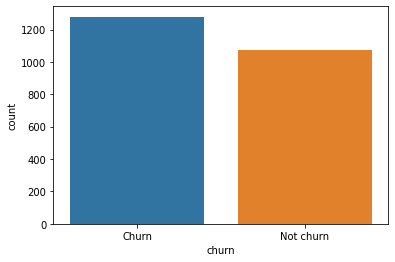

In [ ]:
# visualizing the target variable
g = sns.countplot(feature['churn'])
g.set_xticklabels(['Churn','Not churn'])
plt.show()

In [ ]:
# changing the churn column to numeric
feature['churn'] = feature['churn'].apply(pd.to_numeric)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# import random undersampling and other necessary libraries 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Separating the independent variables from dependent variables
X = feature.drop(columns={'churn', 'mobile_number'})
y = feature['churn']

#Split train-test data in the ratio of 70%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

# summarize class distribution
print("Before undersampling: ", Counter(y_train))

# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
X_test_under, y_test_under = undersample.fit_resample(X_test, y_test)
# summarize class distribution
print("After undersampling: ", Counter(y_train_under))

warnings.simplefilter(action='ignore', category=FutureWarning)



Before undersampling:  Counter({1: 904, 0: 743})
After undersampling:  Counter({0: 743, 1: 743})


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


### **iv).Binary Classification Model with XGBoost**

In [ ]:
# ranked correlations
feature.corr()['churn'].sort_values(ascending=False)

churn               1.000000
std_og_t2t_mou_6    0.062376
std_og_t2m_mou_6    0.044791
onnet_mou_6         0.042310
std_og_t2t_mou_7    0.037636
onnet_mou_7         0.022998
loc_og_t2c_mou_7    0.020994
std_og_t2t_mou_8    0.020869
std_og_t2t_mou_9    0.017790
std_og_t2m_mou_7    0.015829
roam_ic_mou_7       0.013884
onnet_mou_8         0.010893
loc_og_t2c_mou_8    0.008418
loc_og_t2t_mou_6    0.006798
roam_ic_mou_6       0.004073
loc_og_t2t_mou_7    0.002877
roam_og_mou_8       0.000820
std_og_t2m_mou_8   -0.002538
loc_og_t2t_mou_8   -0.003084
loc_og_t2c_mou_6   -0.018427
std_og_t2m_mou_9   -0.027706
mobile_number      -0.028377
offnet_mou_6       -0.042111
std_og_t2f_mou_7   -0.043378
std_og_t2f_mou_6   -0.048732
std_og_t2f_mou_8   -0.051446
loc_og_mou_6       -0.069370
offnet_mou_7       -0.083640
loc_og_mou_7       -0.087669
loc_og_mou_8       -0.096535
offnet_mou_8       -0.108825
loc_og_t2m_mou_6   -0.110474
arpu_6             -0.116104
arpu_7             -0.126828
loc_og_t2f_mou

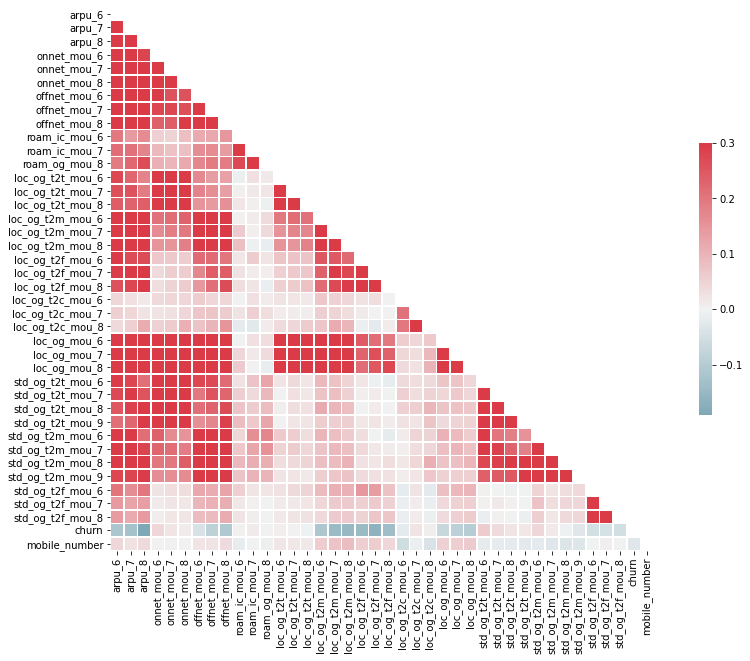

In [ ]:
corr = feature.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .5})
plt.show();

In [ ]:
# writing a funtion for max k
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [ ]:
!pip3 install KMeans

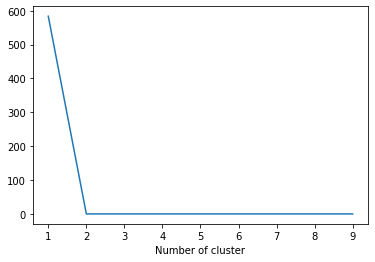

In [ ]:
# identifying and plotting the maximum k
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
sse={}
df_cluster = feature[['churn']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
#building the model & printing the score
import xgboost as xgb
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))


Accuracy of XGB classifier on training set: 0.92


This shows our model is a useful one. Better to check our classification model to see where exactly our model fails.

In [ ]:
from sklearn.metrics import classification_report
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.61      0.60       331
           1       0.65      0.63      0.64       375

    accuracy                           0.62       706
   macro avg       0.62      0.62      0.62       706
weighted avg       0.62      0.62      0.62       706



We can interpret the report above as if our model tells us, 100 customers will churn, 85 of it will churn (0.85 precision). And actually, there are around 340 customers who will churn (0.76 recall). Especially recall is the main problem here, and we can improve our model’s overall performance by:

Adding more data (we have around 2k rows for this example)

Adding more features

More feature engineering

Trying other models

Hyper-parameter tuning

Moving forward, let’s see how our model works in detail. First off, we want to know which features our model exactly used from the dataset. Also, which were the most important ones?

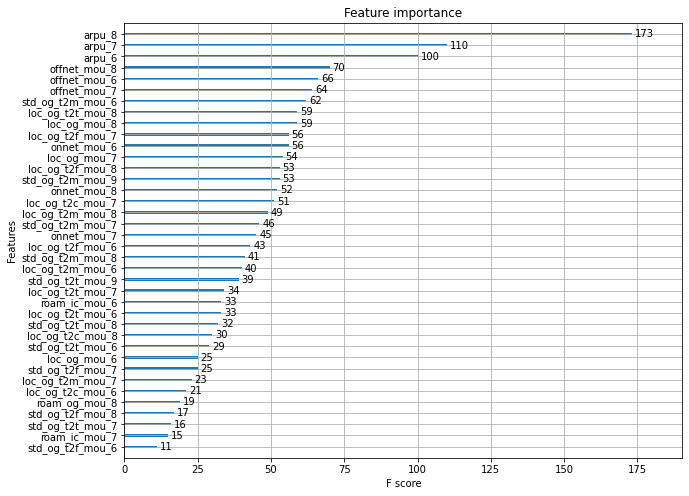

In [ ]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)

We can see that our model assigned more importance to arpu and loc_og_t2m compared to others.



Finally, the best way to use this model is assigning Churn Probability for each customer, create segments, and build strategies on top of that. To get the churn probability from our model, utilize the code block below:

In [ ]:
feature['proba'] = xgb_model.predict_proba(feature[X_train.columns])[:,1]

Our dataset looks like below at the end:

In [ ]:
feature[['mobile_number', 'proba']].head()

,mobile_number,proba
0,7000842753,0.881482
19,7001754084,0.521170
39,7001638780,0.802614
44,7002055948,0.312835
55,7001794818,0.751037


This indicates the extend to which a client will churn

## **6. Recomendations**

1. The Accuracy of XGB classifier on training set is  0.92, this is commendable to use the model since it has a high predictbility power thus promising better predictions.

2. For a better model I recomend the following variables to be used and also for further analysis since they are the most contributing variables according to the factor analysis using the factor loadings: 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
                        'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
                        'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                        'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                        'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
                        'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
                        'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8'

              
3. Since the revenue has been on the same distribution, i recomend the company to diversify its products in order to reduce the risk assiciated with churn.

4. Since the rate of churn is high in this company I recomend the company to give incentives to their customers such as reedemable points and also to beter the service delivery.

5. I recommend the company to incorporate a recommendation system in their system which will enable the personalize their products and also it will help them understand their customers better.

### **Action points**

I would recommend the company to organize the way they store their data and also add some features such as age group in their data which will promote more analysis.